In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
plt.rcParams['figure.figsize'] = (4,3)

In [3]:
data = sns.load_dataset('penguins')

In [4]:
species_styles = {
    'Adelie': {'color': 'tomato', 's': 100, 'alpha': 0.5}, 
    'Chinstrap': {'color': 'dodgerblue', 'marker': 'v'}, 
    'Gentoo': {'color': 'darkgray', 'edgecolor':'black'}
}

# Legend

### Generating and styling the legend 

#### generating legend automatically

https://matplotlib.org/stable/api/legend_api.html

Generate legend automatically from the plotted data: if we add a parameter `label`, it will be added to the legend 

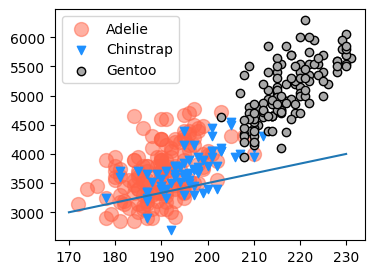

In [5]:
f, ax = plt.subplots()
for sp in data['species'].unique():
    tmp_data = data.query('species == @sp')
    ax.scatter(x=tmp_data['flipper_length_mm'], y=tmp_data['body_mass_g'], 
               **species_styles[sp], 
               label=sp) # notice the label property! 
ax.plot([170,230],[3000,4000], label='_line') # hidden from the legend 
l = ax.legend()

if you want to hide a series from a legend, precede its name with an underscore!

#### reposition the legend

See https://stackoverflow.com/questions/39803385/what-does-a-4-element-tuple-argument-for-bbox-to-anchor-mean-in-matplotlib for an explanation of interplay between bbox and loc

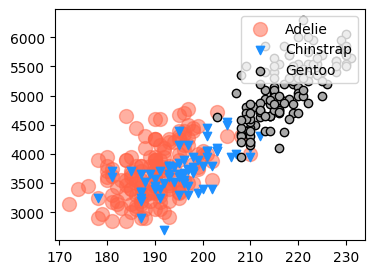

In [6]:
f, ax = plt.subplots()
for sp in data['species'].unique():
    tmp_data = data.query('species == @sp')
    ax.scatter(x=tmp_data['flipper_length_mm'], y=tmp_data['body_mass_g'], **species_styles[sp], 
              label=sp) 

# l = ax.legend(loc='lower right') # loc alone puts the legend inside the axes at a 1 of 9 predefined points 

l = ax.legend(bbox_to_anchor=(1, 1), loc='upper right') 
# now loc relates which corner must be positioned in the point specified by bbox_to_anchor

#### legend with multiple columns 

Number of columns, placing outside and above the chart: 

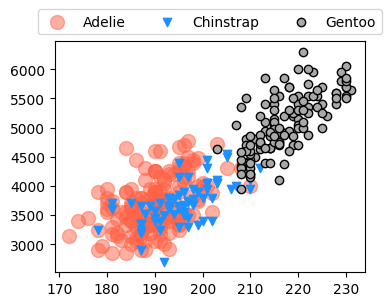

In [7]:
f, ax = plt.subplots()
for sp in data['species'].unique():
    tmp_data = data.query('species == @sp')
    ax.scatter(x=tmp_data['flipper_length_mm'], y=tmp_data['body_mass_g'], **species_styles[sp], 
              label=sp)
    
l = ax.legend(ncol=3, loc='lower center', bbox_to_anchor=(0.5,1))

#### legend with annotations 

We can add custom annotations to the legend, e.g. a custom title or a footnote

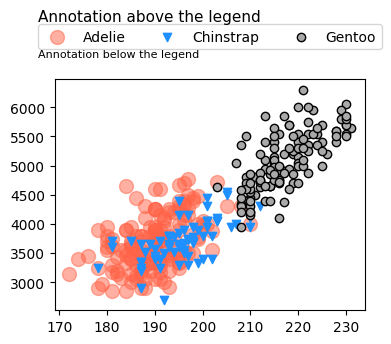

In [8]:
f, ax = plt.subplots()
for sp in data['species'].unique():
    tmp_data = data.query('species == @sp')
    ax.scatter(x=tmp_data['flipper_length_mm'], y=tmp_data['body_mass_g'], **species_styles[sp], 
              label=sp)
    
l = ax.legend(ncol=3, loc='lower center', bbox_to_anchor=(0.5,1.1))
anno_above = ax.annotate(xy=(0,1), text="Annotation above the legend", 
                   xycoords=l,  ha='left', va='bottom', fontsize=11,
                   zorder=99) 
anno_below = ax.annotate(xy=(0,0), text="Annotation below the legend", 
                   xycoords=l,  ha='left', va='top', fontsize=8,
                   zorder=99) 

#### fancy looking legend 

Legend box styling: 

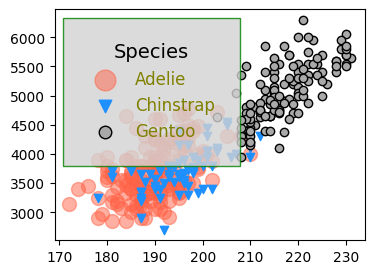

In [9]:
f, ax = plt.subplots()
for sp in data['species'].unique():
    tmp_data = data.query('species == @sp')
    ax.scatter(x=tmp_data['flipper_length_mm'], y=tmp_data['body_mass_g'], **species_styles[sp], 
              label=sp) 
    
l = ax.legend(facecolor='lightgray', fancybox=False, edgecolor='green', fontsize=12, markerscale=1.5, 
             title='Species', title_fontsize=14, borderpad=1.5, labelcolor='olive') 
# borderpad is in fraction of a fontsize

### Creating custom elements in the legend 

Useful if we have some multidimensional encoding, e.g. we use both symbol and color, and we want to have a separate entry for the color, and not each colored symbol listed out 

We can use objects like `Line2D` or `Patch`

#### Custom entry names

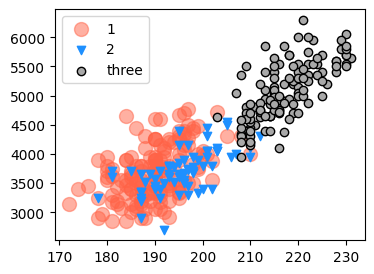

In [10]:
f, ax = plt.subplots()

for sp in data['species'].unique():
    tmp_data = data.query('species == @sp')
    ax.scatter(x=tmp_data['flipper_length_mm'], y=tmp_data['body_mass_g'], **species_styles[sp], 
              label=sp) 

# if we want to manipulate the automatically generated handles and labels, we can read them manually like this: 
handles, labels = ax.get_legend_handles_labels()
    
# option 1: do something with each label 
# l = ax.legend(handles=handles, labels=[x.upper() for x in labels])    

# option 2: overwrite each label arbitrarily (watch out: it depends on the sequence of the handles)
l = ax.legend(handles=handles, labels=['1', '2', 'three'])

In [11]:
labels

['Adelie', 'Chinstrap', 'Gentoo']

#### Creating legend entries from scratch and adding multiple legends to the same figure 

This example used to work in 3.6.8, but has been broken until now

In [12]:
import matplotlib as mpl 
mpl.__version__

'3.8.0'

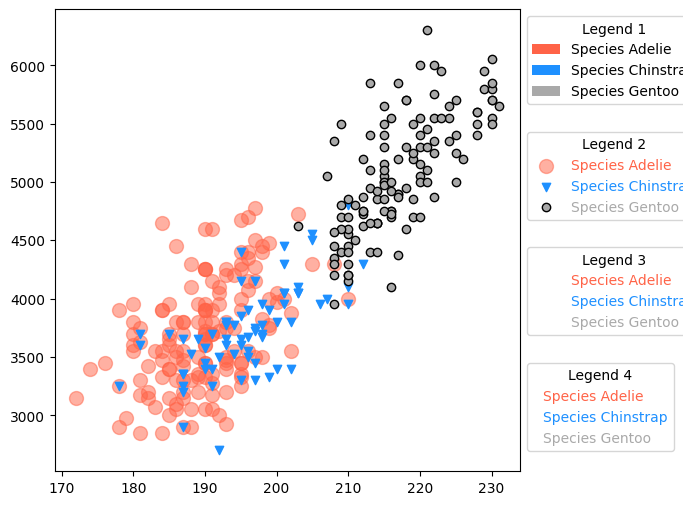

In [13]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

f, ax = plt.subplots(figsize=(6,6), )
    
### here create manual handles and labels from scratch
### we will create 4 different legends and overplot them on the same chart 
### some legends will not contain symbols at all, just colored text 

# initialize all the empty lists 
series = []
handles = []
blankhandles = []
labels = []
lcolors = []

# iterate through the species: 
for sp in data['species'].unique():
    # chart the data
    tmp_data = data.query('species == @sp')
    s = ax.scatter(x=tmp_data['flipper_length_mm'], y=tmp_data['body_mass_g'], 
                   **species_styles[sp], 
                   label=sp) 
    series.append(s)
    
    # create a custom name for the legend entry = label 
    l = 'Species ' + sp
    labels.append(l)
    
    # create a custom legend symbol - here a rectangle patch, using our styling dict 
    h = Patch(facecolor=species_styles[sp]['color'])
    # it could be also a line or a marker: 
#     h = Line2D([0], [0], lw=2, color=species_styles[sp]['color'])
    handles.append(h)
    
    # create a list of blank handles 
    blankhandles.append(Line2D([0], [0], lw=0))
    
    # create a list of colors 
    lcolors.append(species_styles[sp]['color'])
        
l = ax.legend(handles=handles, labels=labels, 
              title='Legend 1', bbox_to_anchor=(1,1), loc='upper left')
ax.add_artist(l) # you have to call this, otherwise the legends will keep overwriting themselves 

# # to recover the symbols used on the chart, we can use the series list which stores our series
l2 = ax.legend(handles=series, labels=labels, labelcolor=lcolors, 
               title='Legend 2', bbox_to_anchor=(1,0.75), loc='upper left') 
ax.add_artist(l2)

# sometimes you may need to use a blank handle, e.g. with custom ordering into columns 
l3 = ax.legend(handles=blankhandles, labels=labels, labelcolor=lcolors, 
               title='Legend 3', bbox_to_anchor=(1,0.5), loc='upper left') 
ax.add_artist(l3)

l4 = ax.legend(handles=handles, labels=labels, labelcolor=lcolors, handlelength=0,  
               title='Legend 4', bbox_to_anchor=(1,0.25), loc='upper left') 

# if in matplotlib above 3.7.1, don't run the last line below 
# ax.add_artist(l4)

Custom legends are useful e.g. if you use color coding with intensity gradient (e.g. grouped bars) and you only want to show the base colors. 

___